In [79]:
from pyta.main import get_data, get_data_file
from itables import init_notebook_mode
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd

init_notebook_mode(all_interactive=True)
%matplotlib inline

In [80]:
frequency_map, distances = get_data(get_data_file())

In [81]:
key_coordinates = {
    "d": (389,252),
    "b": (538,319),
    "y": (830,201),
    "g": (507, 254),
    "m": (927,320),
    "a": (268,247),
    "shift": (198,299),
    "ctrl": (170,363),
    "c": (417,308),
    "e": (372,191),
    "w": (312,186),
}

In [82]:
frequency_map.sort_values(["count"],ascending=False)

count
key         
a         26
m         25
shift     11
D         11
y         11
g         11
ctrl       3
c          3
d          3
e          1
w          1

In [83]:
distances.sort_values(["count"],ascending=False)

count
key   previous       
a     m          24.0
m     a          14.0
D     shift      11.0
y     D          11.0
g     y          11.0
m     g          11.0
shift a           9.0
c     ctrl        3.0
ctrl  a           2.0
d     d           2.0
      a           1.0
e     d           1.0
w     e           1.0
shift w           1.0
ctrl  m           1.0
a     b           0.0

In [84]:
heatmap = frequency_map.copy()
heatmap["lower_cap"] = frequency_map.index.str.lower()
heatmap=heatmap.groupby(by="lower_cap").sum()
heatmap = heatmap.join(pd.DataFrame([{"key": key.lower(), "x": v[0], "y": v[1]} for key,v in key_coordinates.items()]).set_index("key"))

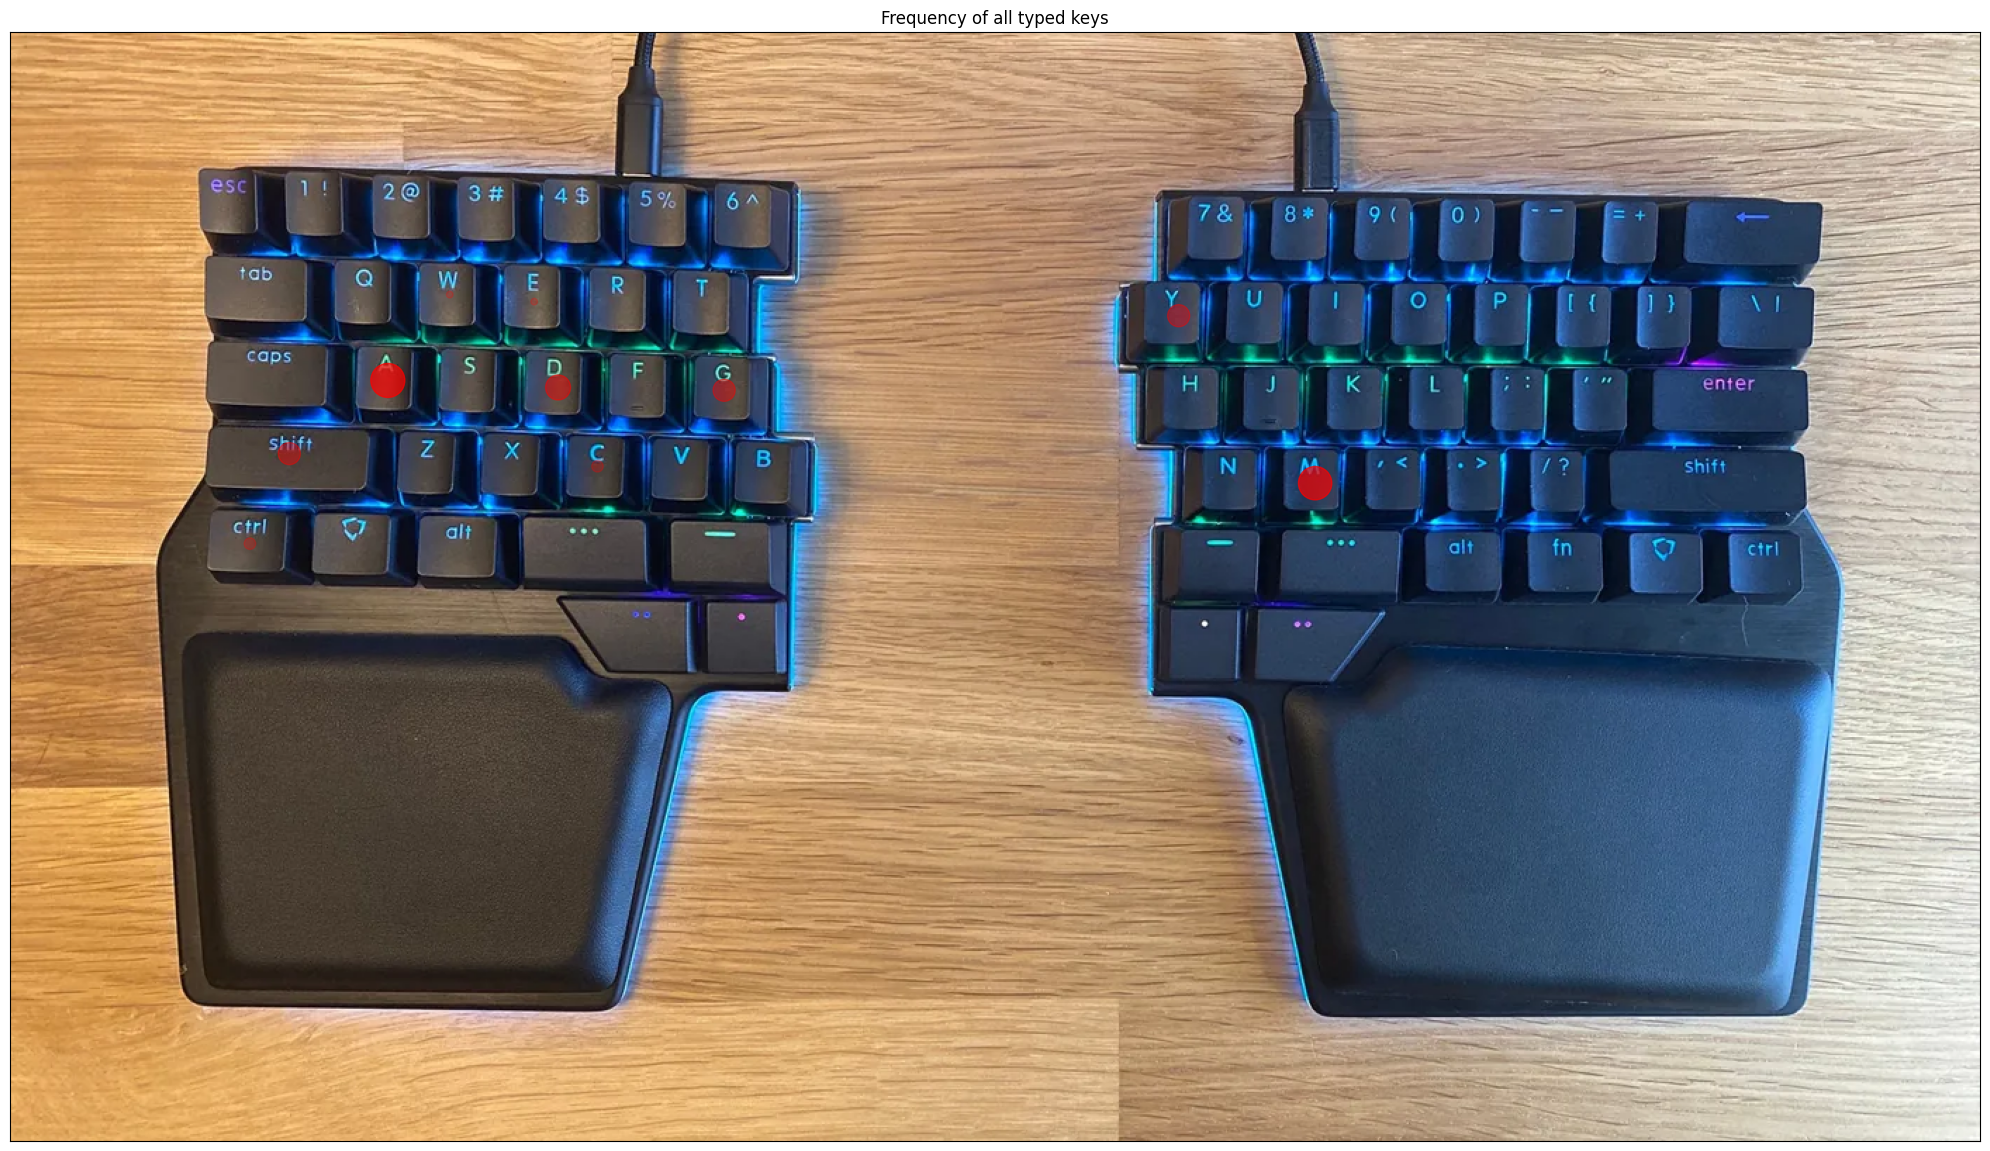

In [85]:
img = np.asarray(Image.open('dygma-raise.png'))
plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.autolayout"] = True
plt.xticks([]) 
plt.yticks([]) 
imgplot = plt.imshow(img)
heatmap["count"].sum()
alpha=heatmap["count"]/heatmap["count"].max()*0.5+0.2
size=heatmap["count"]/heatmap["count"].max()*600
plt.scatter(x=heatmap.x, y=heatmap.y, color="red", s=size, alpha=alpha)
plt.title("Frequency of all typed keys")
plt.show()

In [86]:
bigrams = distances.copy().reset_index().rename(columns={"previous":"neighbour"})
bigrams.key = bigrams.key.str.lower()
bigrams.neighbour = bigrams.neighbour.str.lower()
bigrams=bigrams.groupby(by=["key","neighbour"]).sum()
nxt = bigrams.reset_index().rename(columns={"key":"neighbour", "neighbour":"key", "count":"count_next"}).set_index(["key","neighbour"])
bigrams = bigrams.join(nxt, how="outer").rename(columns={"count": "count_previous"})
bigrams["count_next"]= bigrams["count_next"].fillna(0)
bigrams["count_previous"]= bigrams["count_previous"].fillna(0)
bigrams["count_total"]=bigrams["count_previous"]+bigrams["count_next"]
keys=pd.DataFrame([{"key": key.lower(), "x": v[0], "y": v[1]} for key,v in key_coordinates.items()])
bigrams=bigrams.reset_index()
bigrams=bigrams.set_index("key").join(keys.set_index("key")).reset_index().set_index("neighbour").join(keys.set_index("key"),rsuffix='_neighbour').reset_index().set_index(["key"])

In [87]:
def show_key_neighbour_heatmap(key:str):
    img = np.asarray(Image.open('dygma-raise.png'))
    plt.rcParams["figure.figsize"] = [20, 20]
    plt.rcParams["figure.autolayout"] = True
    plt.xticks([]) 
    plt.yticks([]) 
    imgplot = plt.imshow(img)
    data=bigrams[(bigrams.index==key) & (bigrams.neighbour!=key)]
    alpha=data["count_total"]/data["count_total"].max()*0.5+0.2
    size=data["count_total"]/data["count_total"].max()*600
    plt.scatter(x=data.x_neighbour, y=data.y_neighbour, color="red", s=size, alpha=alpha)
    plt.scatter(x=[data.iloc[0].x], y=[data.iloc[0].y], color="cyan", s=600)
    plt.title(f"Frequency of the keys typed before and after {key}")
    plt.show()
    display(data)

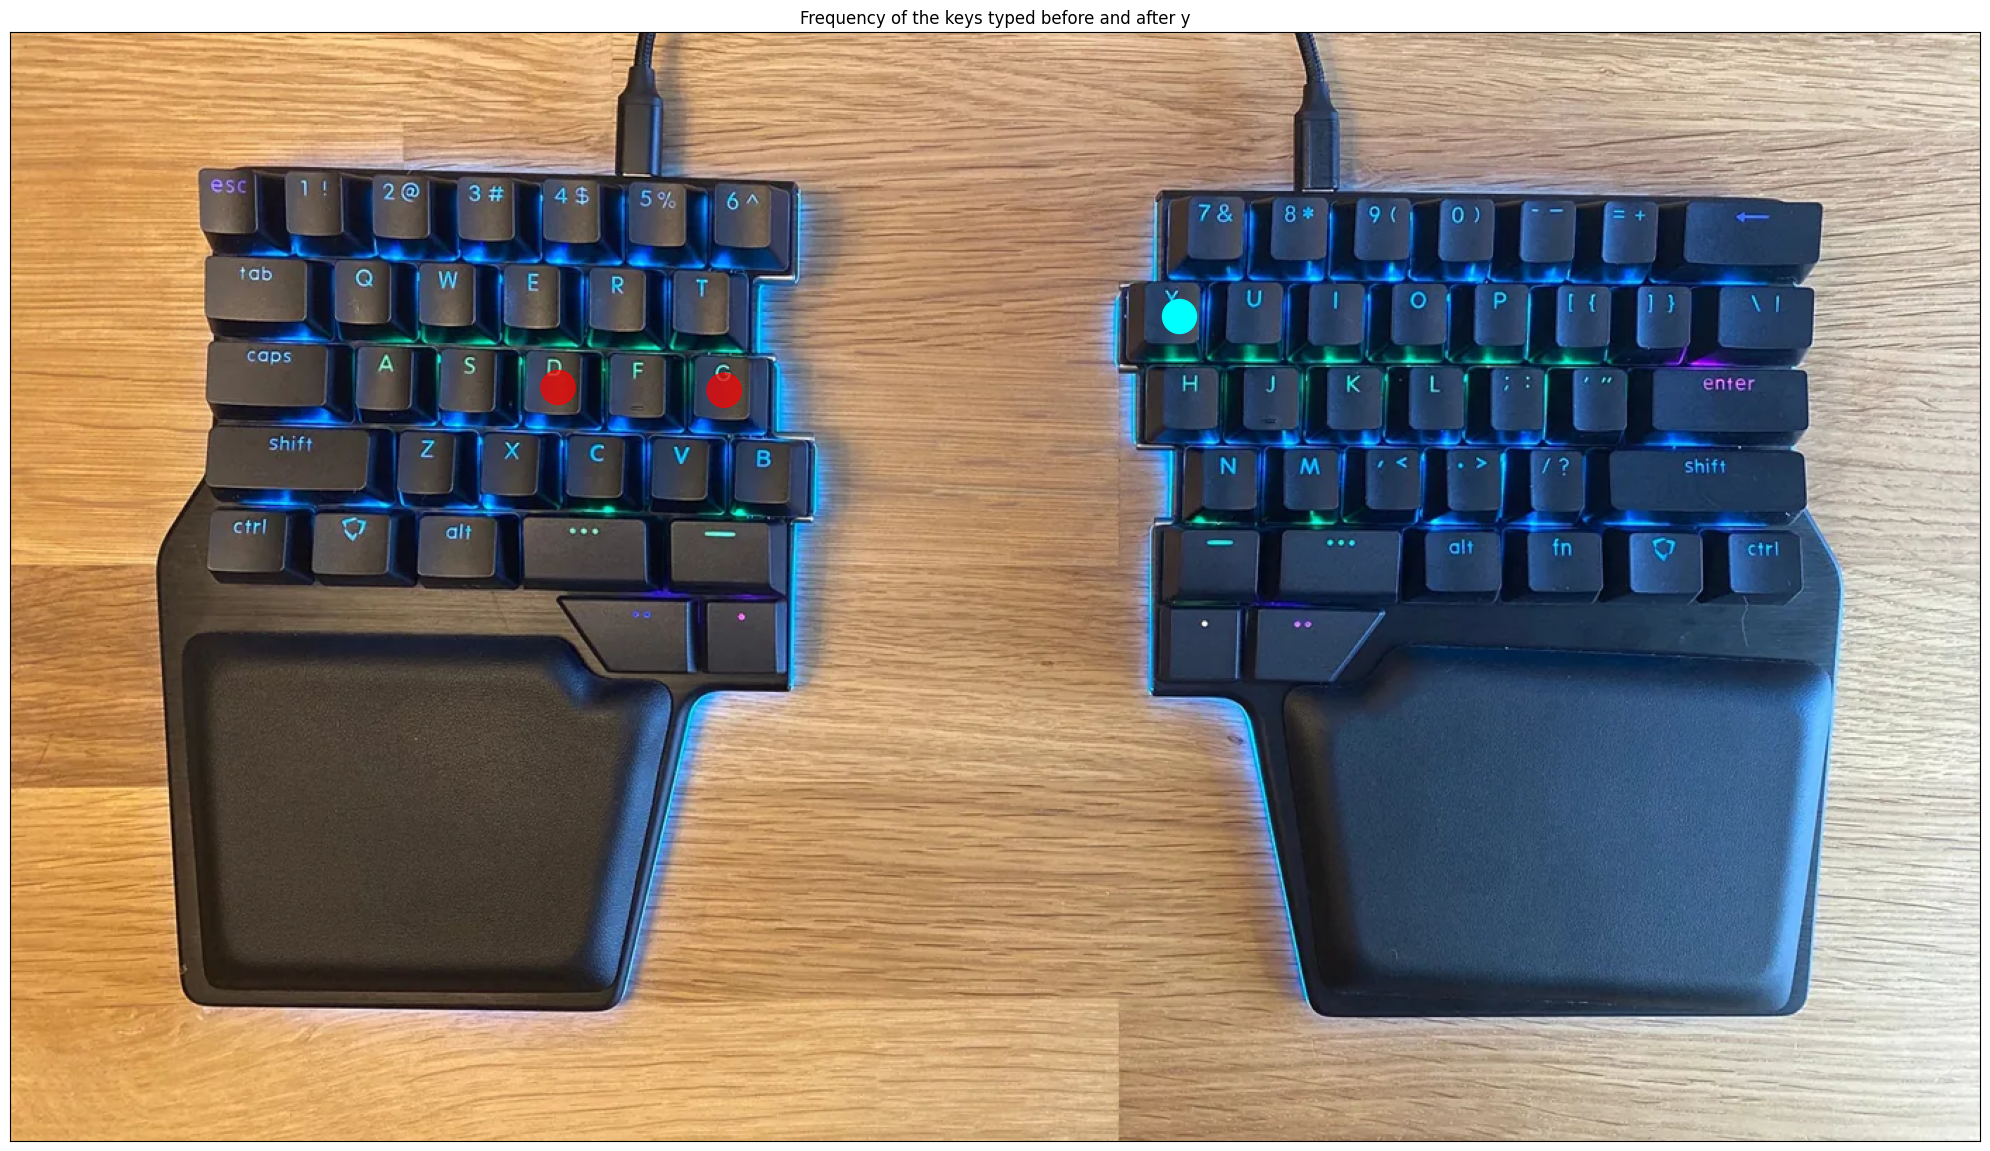

neighbour  count_previous  count_next  count_total    x    y  x_neighbour  \
key                                                                             
y           d            11.0         0.0         11.0  830  201          389   
y           g             0.0        11.0         11.0  830  201          507   

     y_neighbour  
key               
y            252  
y            254

In [88]:
show_key_neighbour_heatmap("y")